In [37]:
print("Project: Student Marks and Grades Summary")
print("Objective: Calculate total, average, grade of students; identify topper and class stats.")

Project: Student Marks and Grades Summary
Objective: Calculate total, average, grade of students; identify topper and class stats.


In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
#Load the dataset
df = pd.read_csv("students_marks.csv")

In [40]:
df.head()

,Name,Math,Science,English
0,Alice,87.0,54.0,90.0
1,Bob,43.0,NaN,70.0
2,Charlie,56.0,43.0,23.0
3,Eva,40.0,60.0,73.0
4,Krish,31.0,93.0,NaN


In [41]:
# Data Cleaning and Preprocessing
# Convert subject columns to numeric (force errors to NaN)
subjects = ["Math", "Science", "English"]
for col in subjects:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [42]:
# Fill missing values with column-wise mean
df[subjects] = df[subjects].apply(lambda col: col.fillna(col.mean()))

In [43]:
df["Average"] = df[["Math", "Science", "English"]].mean(axis=1)

In [44]:
#Grade Assignment Function
def assign_grade(avg):
    if avg >= 90:
        return 'A'
    elif avg >= 75:
        return 'B'
    elif avg >= 60:
        return 'C'
    elif avg >= 40:
        return 'D'
    else:
        return 'F'

df["Grade"] = df["Average"].apply(assign_grade)

In [45]:
#Calculate Total marks
df["Total"] = df[["Math", "Science", "English"]].sum(axis=1)
#Callculate Average marks
df["Average"] = df["Total"] / 3  # or use mean across subject columns


In [46]:
#Class Average and Topper
class_average = df["Average"].mean()
topper_row = df.loc[df["Total"].idxmax()]
topper_name = topper_row["Name"]
topper_score = topper_row["Total"]

In [47]:
# Output Results

print("\nStudent Marks Summary:\n")
print(df[["Name", "Math", "Science", "English", "Total", "Average", "Grade"]].to_string(index=False))


Student Marks Summary:

     Name      Math  Science   English      Total   Average Grade
    Alice 87.000000   54.000 90.000000 231.000000 77.000000     B
      Bob 43.000000   67.125 70.000000 180.125000 60.041667     C
  Charlie 56.000000   43.000 23.000000 122.000000 40.666667     D
      Eva 40.000000   60.000 73.000000 173.000000 57.666667     D
    Krish 31.000000   93.000 69.511628 193.511628 64.503876     C
    Vaani 54.000000   94.000 21.000000 169.000000 56.333333     D
   Taylor 67.000000   85.000 78.000000 230.000000 76.666667     B
   Steven 91.000000   67.125 82.000000 240.125000 80.041667     B
    Belly 45.000000   56.000 69.000000 170.000000 56.666667     D
 Jeremiah 59.829787   73.000 65.000000 197.829787 65.943262     C
   Conrad 62.000000   80.000 69.511628 211.511628 70.503876     C
    Ginny 34.000000   52.000 50.000000 136.000000 45.333333     D
  Georgia 76.000000   77.000 74.000000 227.000000 75.666667     B
     Paul 59.829787   63.000 60.000000 182.829787 6

In [48]:
print("\nClass Average: {}".format(class_average))
print(f"Topper: {topper_name} with {topper_score} marks")


Class Average: 65.48880504700644
Topper: Lion with 283.0 marks


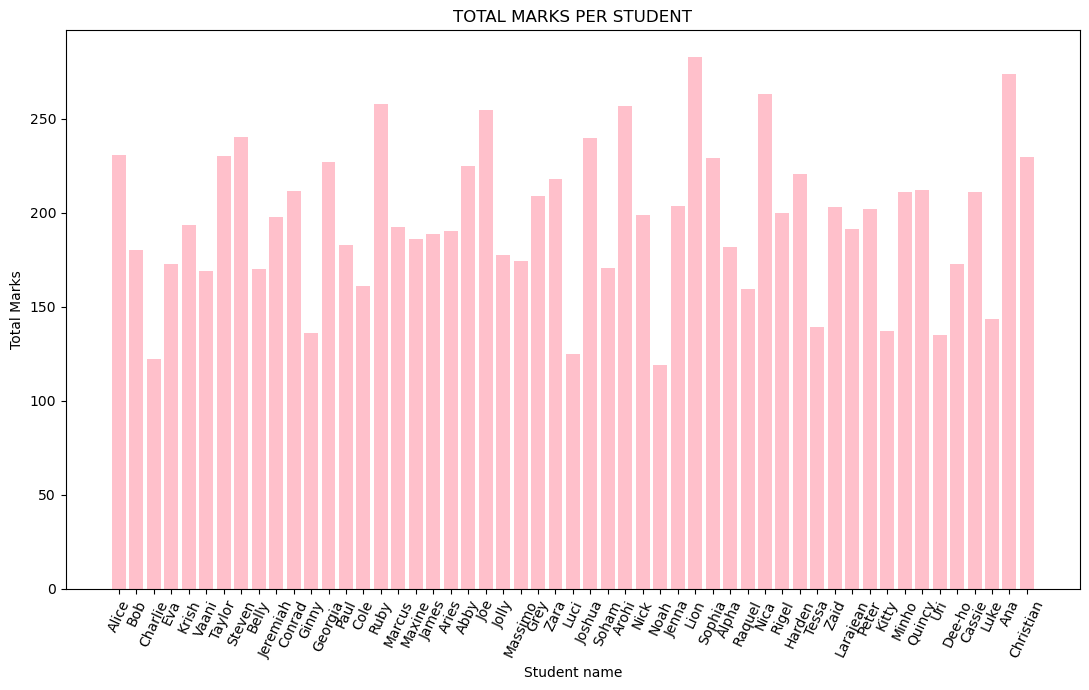

In [49]:
# Step 7: Bar Chart - Total Marks per Student
plt.figure(figsize=(11, 7))
plt.bar(df["Name"], df["Total"], color='pink')
plt.title("TOTAL MARKS PER STUDENT")
plt.xlabel("Student name")
plt.ylabel("Total Marks")
plt.xticks(rotation=65)
plt.grid(True, linestyle="--", axis='y', alpha=0.)
plt.tight_layout()
plt.show()



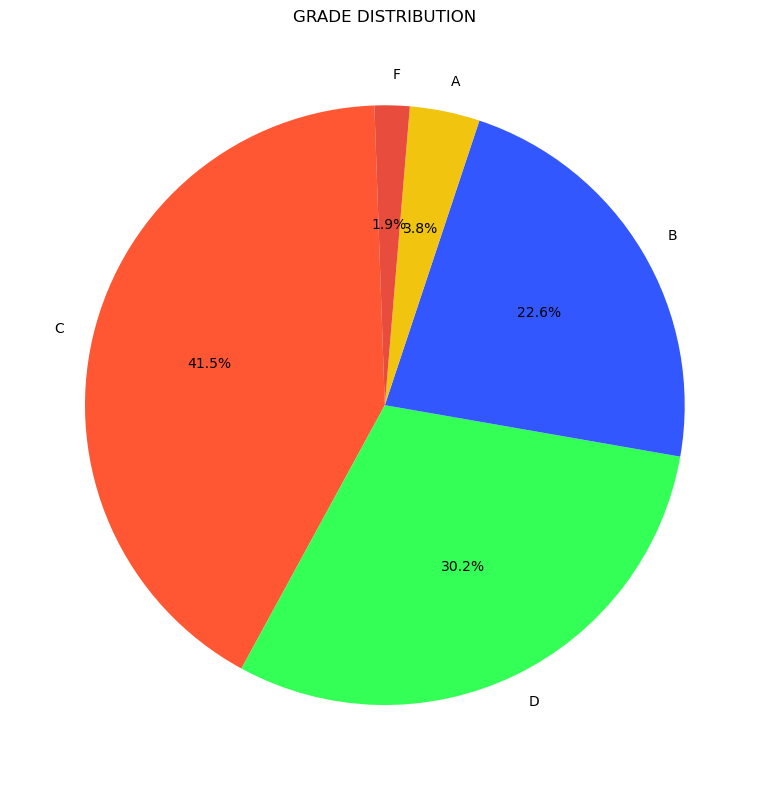

In [50]:
# Step 8: Pie Chart - Grade Distribution
grade_counts = df["Grade"].value_counts()
plt.figure(figsize=(8,8))
plt.pie(grade_counts, labels=grade_counts.index, autopct="%1.1f%%", startangle=92, colors=['#FF5733', '#33FF57', '#3357FF', '#F1C40F', '#E74C3C'])
plt.title("GRADE DISTRIBUTION")
plt.tight_layout()
plt.show()